## Pengujian teory darwin (seleksi alam species geospiza fortis di Galapagos Islands)
pada project kali ini saya akan melakukan analisis terhadap perubahan species burung di sebuah pulau terpencil di Galapagos Islands, pulau ini dipilih oleh karena tidak adanya interaksi habitat dengan manusia dan faktor luar lain sehingga proses seleksi alam terjadi hanya pada faktor yang bisa diamati dari pulau tersebut, data diambil dari tahun 1975 sampai 2012 oleh kelompok ilmuan dari princeton university bernama peter and rosemary grant.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Cleaning

In [2]:
# pembacaan data
df1 = pd.read_csv('finch_beaks_1975.csv')
df2 = pd.read_csv('finch_beaks_2012.csv')

In [3]:
# rubah nama kolum sebelum kita gabung datanya
df1.columns = ['band', 'species', 'blength', 'bdepth']

In [4]:
df1[df1.species == 'scandens' ].head()

,band,species,blength,bdepth
316,302,scandens,13.9,8.4
317,304,scandens,14.0,8.8
318,306,scandens,12.9,8.4
319,310,scandens,13.5,8.0
320,317,scandens,12.9,7.9


In [5]:
df2[df2.species == 'scandens' ].head()

,band,species,blength,bdepth
121,19026,scandens,14.3,9.4
122,19028,scandens,12.5,8.9
123,19029,scandens,13.7,9.5
124,19094,scandens,13.8,11.0
125,19122,scandens,12.0,8.7


In [6]:
df2['year'] = 2012
df1['year'] = 1975

In [7]:
#kita akan buang data yang tidak kitabutuhkan
df1.drop('band', axis=1, inplace=True)
df2.drop('band', axis=1, inplace=True)


In [8]:
fortis = pd.concat([df1[df1.species == 'scandens' ], df2[df2.species == 'scandens' ]], sort=False, ignore_index=True)

In [9]:
fortis.head()

,species,blength,bdepth,year
0,scandens,13.9,8.4,1975
1,scandens,14.0,8.8,1975
2,scandens,12.9,8.4,1975
3,scandens,13.5,8.0,1975
4,scandens,12.9,7.9,1975


## EDA ( exploratory data analysis) dari panjang paruh burung geospiza fortis 


kita akan melihat bagaimana panjang paruh (jarak, atas ke bawah, paruh tertutup) spesies Geospiza scandens telah berubah dari waktu ke waktu.

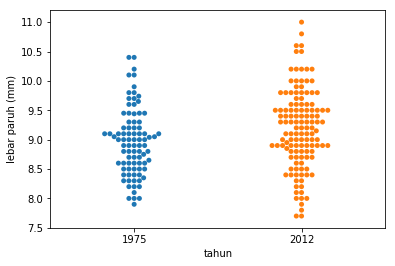

In [10]:
# buat tabel beeswarm dengan seaborn
_ = sns.swarmplot('year', 'bdepth', data=fortis)

_ = plt.xlabel('tahun')
_ = plt.ylabel('lebar paruh (mm)')

plt.show()

Agak sulit untuk melihat apakah ada perbedaan yang jelas antara data tahun 1975 dan 2012. akan tetapi, terlihat bahwa rata-rata data 2012 mungkin sedikit lebih tinggi, dan mungkin memiliki varian yang lebih besar.

## Empirical Comulative Distribution Function (ECDF) dari lebar paruh

Meskipun sudah digunkan beswam plot, kita tahu bahwa menggunakan ECDF seringkali lebih baik ketika melakukan EDA. kita akan melihat Plot ECDF untuk pengukuran panjang paruh 1975 dan 2012.

In [11]:
# kita pisah data sebelum melakukan ecdf
data1975 = df1[df1.species == 'scandens'][['bdepth']].sort_values('bdepth')
data2012 = df2[df2.species == 'scandens'][['bdepth']].sort_values('bdepth')

In [12]:
data1975.reset_index(drop=True)
data2012.reset_index(drop=True)

,bdepth
0,7.7
1,7.7
2,7.8
3,7.9
4,8.0
5,8.0
6,8.0
7,8.1
8,8.1
9,8.2


In [13]:
# kita akan biat fungsi ECDF

def ecdf(data):
    """melakukan perhitungan ecdf untuk 1-d array."""
    # panjang data: n
    n = len(data)

    # data pada sumbu x
    x= np.sort(data)

    # data pada sumbu y
    y= np.arange(1, n+1) / n

    return x, y

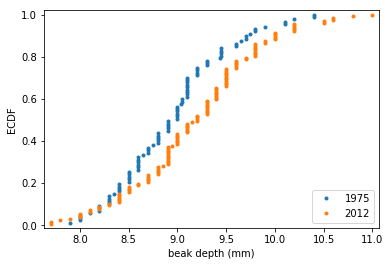

In [14]:
# hitung ECDFs
x_1975, y_1975 = ecdf(data1975)
x_2012, y_2012 = ecdf(data2012)

# Plot ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# label dan legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# tampilkan plot
plt.show()

Perbedaannya jauh lebih jelas dalam ECDF. nilai mean data 2012 lebih besar, dengan varian yang juga tampak lebih besar.


## Perkiraan parameter panjang paruh

perkiraan perbedaan panjang paruh rata-rata sampel G. scandens dari tahun 1975 dan 2012 dengan interval kepercayaan 95%.

In [15]:
# buat menjadi 1d array
data_2012 =  np.array(data2012.bdepth)
data_1975 =  np.array(data1975.bdepth)

In [16]:
# menbuat fungsi bootstrap cinvidence interval

def bootstrap_replicate_1d(data, func):
    # func datap diisi np.mean atau np.var
    # lihat mana yang normal distribution
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """membuat bootstrap"""

    # array akan diisi hasil replika
    bs_replicates = np.empty(size)

    # membuat replika
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

In [17]:
# hitung perbedaan mean sample
mean_diff = np.mean(data_2012) - np.mean(data_1975)

# membuat bootstrap
bs_replicates_1975 = draw_bs_reps(data_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(data_2012, np.mean, 10000)

# hitung perbedaan mean bootstrap
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# perhitungan dengan interval kepercayaan 95%
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# lihat hasilnya
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.2262204724409429 mm
95% confidence interval = [0.06050032 0.39436481] mm


perubahan sebesar 0,2 mm dalam 37 tahun adalah perubahan yang substansial oleh standar evolusi. Jika terus berubah pada level itu, lebar paruh akan menjadi 2 kali semula hanya dalam 400 tahun.

## Uji hipotesis: Apakah paruh benar-beanar lebih lebar pada 2012?

menggunakan ECDF dan interval kepercayaan membarikan gambaran cukup jelas bahwa paruh G. scandens semakin lebar. Tetapi apakah mungkin efek ini hanya karena kebetulan acak? Dengan kata lain, berapakah kemungkinan bahwa kita akan mendapatkan perbedaan mean lebar paruh untuk pengujian berulang, jika meannya sama?

In [18]:
# menguji null hypotesis 
# dengan asumsi awal bahwa perbadaan mean hanya terjadi karena kesalahan sampling
# jika kedua data sama maka perbedaan mean yang akan terjadi pasti akan cenderung lebih kecil untuk pengujian berulang
# untuk menolak hypotesis ini maka akan ada 2 kemungkinan perbedaan mean tetap sama atau lebih besar

# membuat mean data kombinasi 1975 dan 2012
combined_mean = np.mean(np.concatenate((data_1975, data_2012)))

# Shift sampelnya
data_1975_shifted = data_1975 - np.mean(data_1975) + combined_mean
data_2012_shifted = data_2012 - np.mean(data_2012) + combined_mean

# membuat replika bootstrap
bs_replicates_1975 = draw_bs_reps(data_1975_shifted, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(data_2012_shifted, np.mean, 10000)

# melihat perbadaan mean bootstrap
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# menhitung p_value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)


p = 0.0041


kita mendapatkan p-value 0,0034, nilai yang sangat kecil. nilai ini menolak null hypotesis, yang artinya memang ada perbedaan mean yang signifikan secara statistik. 


## Analisis hubungan panjang paruh dengan lebar paruh

salah satu hipotesis terjadinya pertambahan leber paruh adalah kerena kekeringan pada 1975/1976 disana, sehingga populasi tanaman dengan ukuran biji yang kecil mengalami kematian, dan hanya tanaman dengan biji berukuran besar yang dapat selamat. Tanaman berbiji besar butuh paruh yang lebih lebar untuk memecahnya, sehingga burung dengan paruh lebar lah yang selamat dari seleksi ini dan terus berkembang biak hingga sekarang. 


Apakah akan ada perbedaan antara panjang paruh dan lebarnya, jika panjang dan lebar paruh terus bertambah dengan proporsi yang sama, maka bentuk paruh akan cenderung tetap, dan hanya menjadi lebih besar dari ukuran sebelumnya. Tetapi jika proporsi perubahan panjang dan lebar paruh berubah maka bentuk paruh juga akan berubah seiring waktu

In [19]:
# kita pisah data sebelum melakukan ecdf
panjang1975 = df1[df1.species == 'scandens'][['blength']]
panjang2012 = df2[df2.species == 'scandens'][['blength']]
# kita pisah data sebelum melakukan ecdf
lebar1975 = df1[df1.species == 'scandens'][['bdepth']]
lebar2012 = df2[df2.species == 'scandens'][['bdepth']]

In [20]:
# membuat array
panjang1975.reset_index(drop=True)
panjang2012.reset_index(drop=True)
panjang_2012 =  np.array(panjang2012.blength)
panjang_1975 =  np.array(panjang1975.blength)

lebar1975.reset_index(drop=True)
lebar2012.reset_index(drop=True)
lebar_2012 =  np.array(lebar2012.bdepth)
lebar_1975 =  np.array(lebar1975.bdepth)

## EDA dari panjang dan lebar paruh

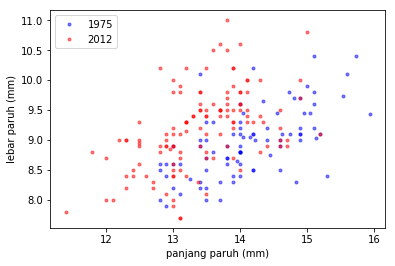

In [21]:
# Make scatter plot of 1975 data
_ = plt.plot(df1[df1.species=='scandens'].blength, df1[df1.species=='scandens'].bdepth, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(df2[df2.species=='scandens'].blength, df2[df2.species=='scandens'].bdepth, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('panjang paruh (mm)')
_ = plt.ylabel('lebar paruh (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

dilihat dari plot yang ada, maka pada tahun 2012 paruh menjadi lebih lebar, ditunjukkan olah titik merah yang lebih tinggi pada arah sumbu-y, namun paruh tidak menjadi semakin panjang, malah semakin memendek, ditunjukkan oleh sumbu-x yang didominasi warna biru. Artinya bentuk paruh dalam selang waktu 37 tahun semakin lebar, dan memendek

## Regresi linier

kita akan melakukan regresi linier untuk data tahun 1975 dan 2012. Kemudian melakukan bootstrap untuk membuat selang kepercayaan  95% untuk slope(koifisien) dan intercept(konsanta) garis regresi.



In [22]:
# kita akan meggunakan piar bootstrap untuk melakukan replicate dua data ------------------------------------
def draw_bs_pairs_linreg(x, y, size=1):
    """Melakukan bootstrap untuk regrsi linier."""

    # bikin index yang kemudian akan diambil secara random
    inds = np.arange(len(x))

    # mulai membuat replika
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    
    for i in range(size):
    # pemilihan index secara random dimulai
        bs_inds = np.random.choice(inds, size=len(inds))

        # ambil data x dan y sesuai index random yang dipilih dari inds
        bs_x, bs_y = x[bs_inds], y[bs_inds]

        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

In [23]:
# menghitung regresi liner
slope_1975, intercept_1975 = np.polyfit(panjang_1975, lebar_1975, 1)
slope_2012, intercept_2012 = np.polyfit(panjang_2012, lebar_2012, 1)

# melakukan bootstrap regresi linier
bs_slope_reps_1975, bs_intercept_reps_1975 = \
        draw_bs_pairs_linreg(panjang_1975, lebar_1975, 1000)

bs_slope_reps_2012, bs_intercept_reps_2012 = \
        draw_bs_pairs_linreg(panjang_2012, lebar_2012, 1000)

# menghitung selang kepercayaan (convidence interval)
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])

slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])

intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975, [2.5, 97.5])

intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, [2.5, 97.5])



print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.46520516916059357 conf int = [0.33640327 0.59656794]
1975: intercept = 2.3908752365842285 conf int = [0.55245078 4.21953569]
2012: slope = 0.4626303588353126 conf int = [0.33988623 0.60873483]
2012: intercept = 2.9772474982360184 conf int = [1.04629377 4.59776105]


Bisa dilihat kalau data memiliki intercept(konsanta) yang sama tetapi slope(variabel regresinya) berbeda

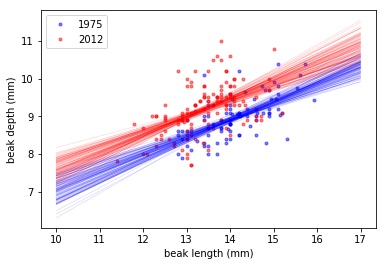

In [24]:
# membuat scatter plot dari data yang ada
_ = plt.plot(panjang_1975, lebar_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(panjang_2012, lebar_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# rentang nilai untuk bootstaping
x = np.array([10, 17])

# membuat plot
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i]*x + bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i]*x + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='red')

plt.show()

## Rasio panjang dan lebar paruh

Regresi linier menunjukkan informasi menarik tentang geometri paruh. Kemiringannya(variabel regresi) sama pada tahun 1975 dan 2012 yaitu sebesar 0.46, menunjukkan bahwa untuk setiap milimeter pertambahan panjang paruh, burung-burung tersebut memperoleh pelebaran paruh sebesar 0.46 milimeter.

Namun, jika kita tertarik dengan bentuk paruh, kita ingin membandingkan rasio panjang paruh dengan lebar paruh.

1975: mean ratio = 1.5788823771858533 conf int = [1.55664114 1.60086802]
2012: mean ratio = 1.4658342276847767 conf int = [1.44394157 1.48749437]
mean ratio decrease in 37 year = 7.160010849102634


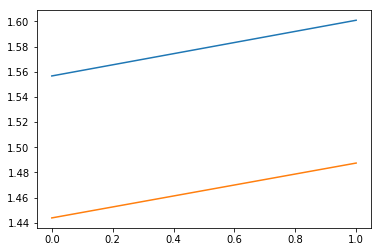

In [25]:
# Compute length-to-depth ratios
ratio_1975 = panjang_1975/lebar_1975
ratio_2012 = panjang_2012/lebar_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, 10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975,[0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012,[0.5, 99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)
print ('mean ratio decrease in 37 year =', (mean_ratio_1975-mean_ratio_2012)/mean_ratio_1975*100)
_ = plt.plot(conf_int_1975)
_ = plt.plot(conf_int_2012)
plt.show()

Rasio panjang dan lebar paruh rata-rata menurun sekitar 0,1 milimeter, atau 7.16%, dari 1975 hingga 2012. bahkan dengan selang kepercayaan 99% data sangat jauh dari bersinggungan, hal ini menunjukkan perubahan yang nyata. Bentuk paruh benar-benar berubah.

## Perhitungan heritabilitas

Apa penyebab sebenarnya terjadi penambahan lebar paruh pada burung scandens, pada pendapat pertama hal ini terjadi karena bencana kekeringan disana yang menyababkan punahnya tanaman berbiji kecil. Akan tetapi dapat dilihat juga kalau dari awal 1975 sudah terdapat burung scandens dengan paruh yang lebar. Hal ini karena terjadi persilangan antara species scandens dengan fortis yang memiliki paruh lebih lebar. Selanjutnya kita akan melihat pengaruh heritabilitas(keturunan) terhadap perubahan lebar paruh.

In [26]:
# kita buat array untuk scandens dan fortis

df3 = pd.read_csv('scandens_beak_depth_heredity.csv')
df4 = pd.read_csv('fortis_beak_depth_heredity.csv')

In [27]:
# nilai dari lebar_parent_scandens adalah rata-rata antara jantan dan betina
lebar_parent_scandens = np.array(df3.mid_parent)
lebar_offspring_scandens = np.array(df3.mid_offspring)


In [28]:
# menghitung rata-rata jantan dan betina
df4['mean'] = df4.apply(lambda x :(x['Male BD']+x['Female BD'])/2, axis=1)

In [29]:
lebar_parent_fortis = np.array(df4['mean'])
lebar_offspring_fortis = np.array(df4['Mid-offspr'])

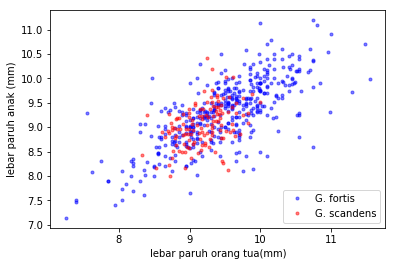

In [30]:
# membuat plot
_ = plt.plot(lebar_parent_fortis, lebar_offspring_fortis,
             marker='.', linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(lebar_parent_scandens, lebar_offspring_scandens,
             marker='.', linestyle='none', color='red', alpha=0.5)

_ = plt.xlabel('lebar paruh orang tua(mm)')
_ = plt.ylabel('lebar paruh anak (mm)')
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')


plt.show()


dari plot terlihat bahwa korelasi yang lebih kuat ditunjukan oleh orang tua species fortis dibandingkan dari species scandens. Ini menunjukkan bahwa lebar paruh lebih kuat diwariskan dari gen species fortis.

## Korelasi keturunan antara anak dan orang tua

Untuk menghitung korelasi keturunan antara  lebar paruh anak dan orangtua, kita akan menghitung secara statistik, seperti koefisien korelasi Pearson antara orangtua dan anak, Mencari interval kepercayaan



In [31]:
#kita akan membuta fungsi pair bootstrap untuk melihat nilai dengan fungsi statistik yang kita mau

def draw_bs_pairs(x, y, func, size=1):
    """fungsi pair bootstrap untuk menentukan statistik yang kita mau"""

    # set nilai array
    inds = np.arange(len(x))

    # buat replika
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates

## Korelasi Pearson antara anak  dan orang tua

Koefisien korelasi Pearson sepertinya merupakan pilihan yang tepat untuk melihat seberapa kuat hubungan antara lebar paruh orang tua yang diwariskan ke keturunan mereka.

In [32]:
def pearson_r(x, y):
    """menhitung korelasi pearson antara dua array"""   
    corr_mat = np.corrcoef(x,y)    
    return corr_mat[0,1]

In [33]:
# Menghitung korelasi person data yang ada
r_scandens = pearson_r(lebar_parent_scandens, lebar_offspring_scandens)
r_fortis = pearson_r(lebar_parent_fortis, lebar_offspring_fortis)

# malakukan bootstaping untuk fungsi Pearson r
bs_replicates_scandens = draw_bs_pairs(lebar_parent_scandens, lebar_offspring_scandens,pearson_r,1000)
bs_replicates_fortis = draw_bs_pairs(lebar_parent_fortis, lebar_offspring_fortis, pearson_r, 1000)


# menghitung 95% selang kepercayaan
conf_int_scandens = np.percentile(bs_replicates_scandens,[2.5,97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis,[2.5,97.5])

print('spesies scandens:', r_scandens, conf_int_scandens)
print('spesies fortis:', r_fortis, conf_int_fortis)


spesies scandens: 0.41170636294012586 [0.26696817 0.53655113]
spesies fortis: 0.7283412395518486 [0.66681368 0.77827427]


Jelas terlihat dari interval kepercayaan bahwa, paruh anak-anak keturunan yang ada berkorelasi lebih kuat denga orang tua species fortis daripada species scandens.

## Mengukur heritabilitas

dari awal kita menggunakan koefisien korelasi Pearson antara rasio varian anak keturunan dengan rata-rata varian dari kedua orang tua. 

tetapi untuk melihat keterkaitan heritabilitas mungkin akan lebih masuk akal jika kita  mendefinisikan heritabilitas sebagai rasio kovarians antara orang tua dan anak dibandingkan dengan varian data orang tua. Dalam hal ini kita akan memperkirakan heritabilitas dan melakukan perhitungan bootstrap untuk mendapatkan interval kepercayaan 95%.



In [34]:
def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[1,0] / covariance_matrix[0,0]

# Compute the heritability
heritability_scandens = heritability(lebar_parent_scandens, lebar_offspring_scandens)
heritability_fortis = heritability(lebar_parent_fortis, lebar_offspring_fortis)

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(lebar_parent_scandens, lebar_offspring_scandens, heritability, size=1000)
        
replicates_fortis = draw_bs_pairs(lebar_parent_fortis, lebar_offspring_fortis, heritability, size=1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens,[2.5,97.5])
conf_int_fortis = np.percentile(replicates_fortis,[2.5,97.5])

# Print results
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)


G. scandens: 0.5485340868685983 [0.34630122 0.75896698]
G. fortis: 0.7229051911438156 [0.64086378 0.79791   ]


Sekali lagi, kita melihat bahwa spesies fortis memiliki heritabilitas yang lebih kuat daripada spesies scandens.

kita juga bisa melakukan null hypitesis untuk melihat apakah species fortis benar benar lebih tinggi dari spesies scandens

In [35]:
# Initialize array of replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(lebar_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted,
                                      lebar_offspring_scandens)

# Compute p-value: p
p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# Print the p-value
print('p-val =', p)


p-val = 0.0


dengan p-value nol maka dari 10000 permutasi tidak ada kemungkinan dimana hereditas scandens lebih besar dari fortis, sehingaa sudah sangat tepat bahwa spesies fortis lah yang berperan besar terhadap perubahan bentuk paruh spesies scandens dalam 37 tahun pengambilan sampel.